In [16]:
import torch

import sys
import os

sys.path.append(os.path.abspath(".."))
from models.mobilenetv3 import MobileNetV3Extractor

In [17]:
dummy_input = torch.randn(2, 20, 3, 224, 224)  # [B, T, C, H, W]
print("simulate input shape:", dummy_input.shape)

simulate input shape: torch.Size([2, 20, 3, 224, 224])


In [18]:
model = MobileNetV3Extractor()
model.eval()

with torch.no_grad():
    features = model(dummy_input)

print("output shape", features.shape)  # [2, 20, D]

output shape torch.Size([2, 20, 960])


single frame feature shape: torch.Size([960])


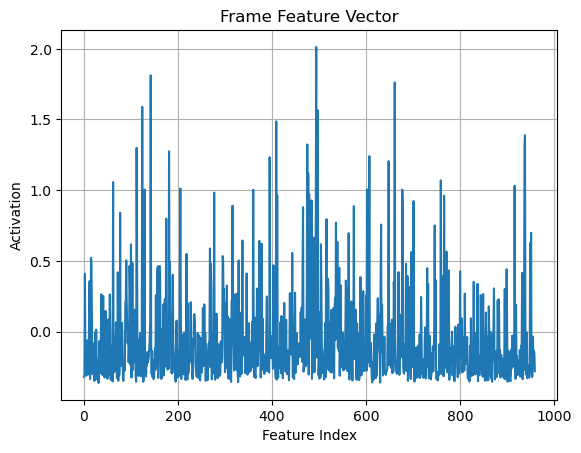

In [19]:
import matplotlib.pyplot as plt

# The first video, features of the first frame
frame_vector = features[0, 0]  # shape [D]
print("single frame feature shape:", frame_vector.shape)

plt.plot(frame_vector.numpy())
plt.title("Frame Feature Vector")
plt.xlabel("Feature Index")
plt.ylabel("Activation")
plt.grid(True)
plt.show()

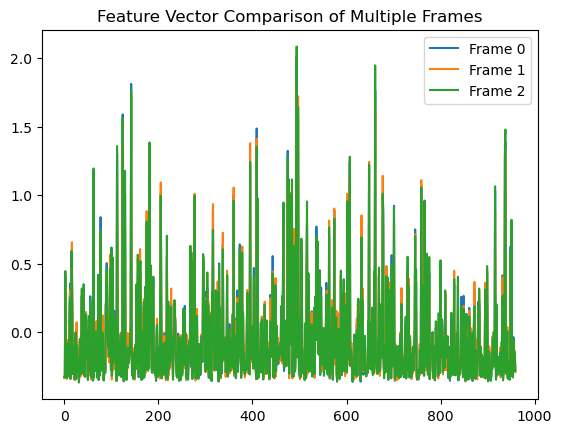

In [20]:
for i in range(3):
    vec = features[0, i].cpu().numpy()
    plt.plot(vec, label=f"Frame {i}")
plt.legend()
plt.title("Feature Vector Comparison of Multiple Frames")
plt.show()